In [1]:
import os

if 'COLAB_GPU' in os.environ:
  print("GPU IS enabled")
else:
  print("GPU IS not enabled")

GPU IS enabled


**INSTALL YOLO-8 Model**

In [2]:
!pip install ultralytics==8.0.20

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.9 MB/s eta 0:00:00


**Check If YOLO-8 has been installed properly or not**

In [3]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


**Import Dataset from Roboflow**

In [4]:
%pwd

'/content'

In [5]:
!mkdir RoadSignDetection

In [6]:
!ls

RoadSignDetection


In [7]:
%pwd

'/content'

In [9]:
os.chdir("/content/RoadSignDetection")

In [10]:
os.chdir("/content/RoadSignDetection")

'/content/RoadSignDetection'

In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nMR2Q9F9mEqqrp9XinBk")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Cars-6 in yolov8:: 100%|██████████| 9950/9950 [00:01<00:00, 5416.02it/s]


**Training The YOLOv8 Over A Custom Dataset**

In [12]:
os.chdir("/content/RoadSignDetection/Self-Driving-Cars-6")

In [13]:
%pwd

'/content/RoadSignDetection/Self-Driving-Cars-6'

In [14]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/RoadSignDetection/Self-Driving-Cars-6/data.yaml epochs=10 imgsz=640 batch=16

100% 6.23M/6.23M [00:00<00:00, 129MB/s]

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load

**Display Some Of The Content We Obtained**

In [15]:
!ls '/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/weights'

best.pt  last.pt


In [16]:
!ls '/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train'

args.yaml					    F1_curve.png  R_curve.png  weights
confusion_matrix.png				    P_curve.png   results.csv
events.out.tfevents.1736514290.90099dabcc2e.5723.0  PR_curve.png  results.png


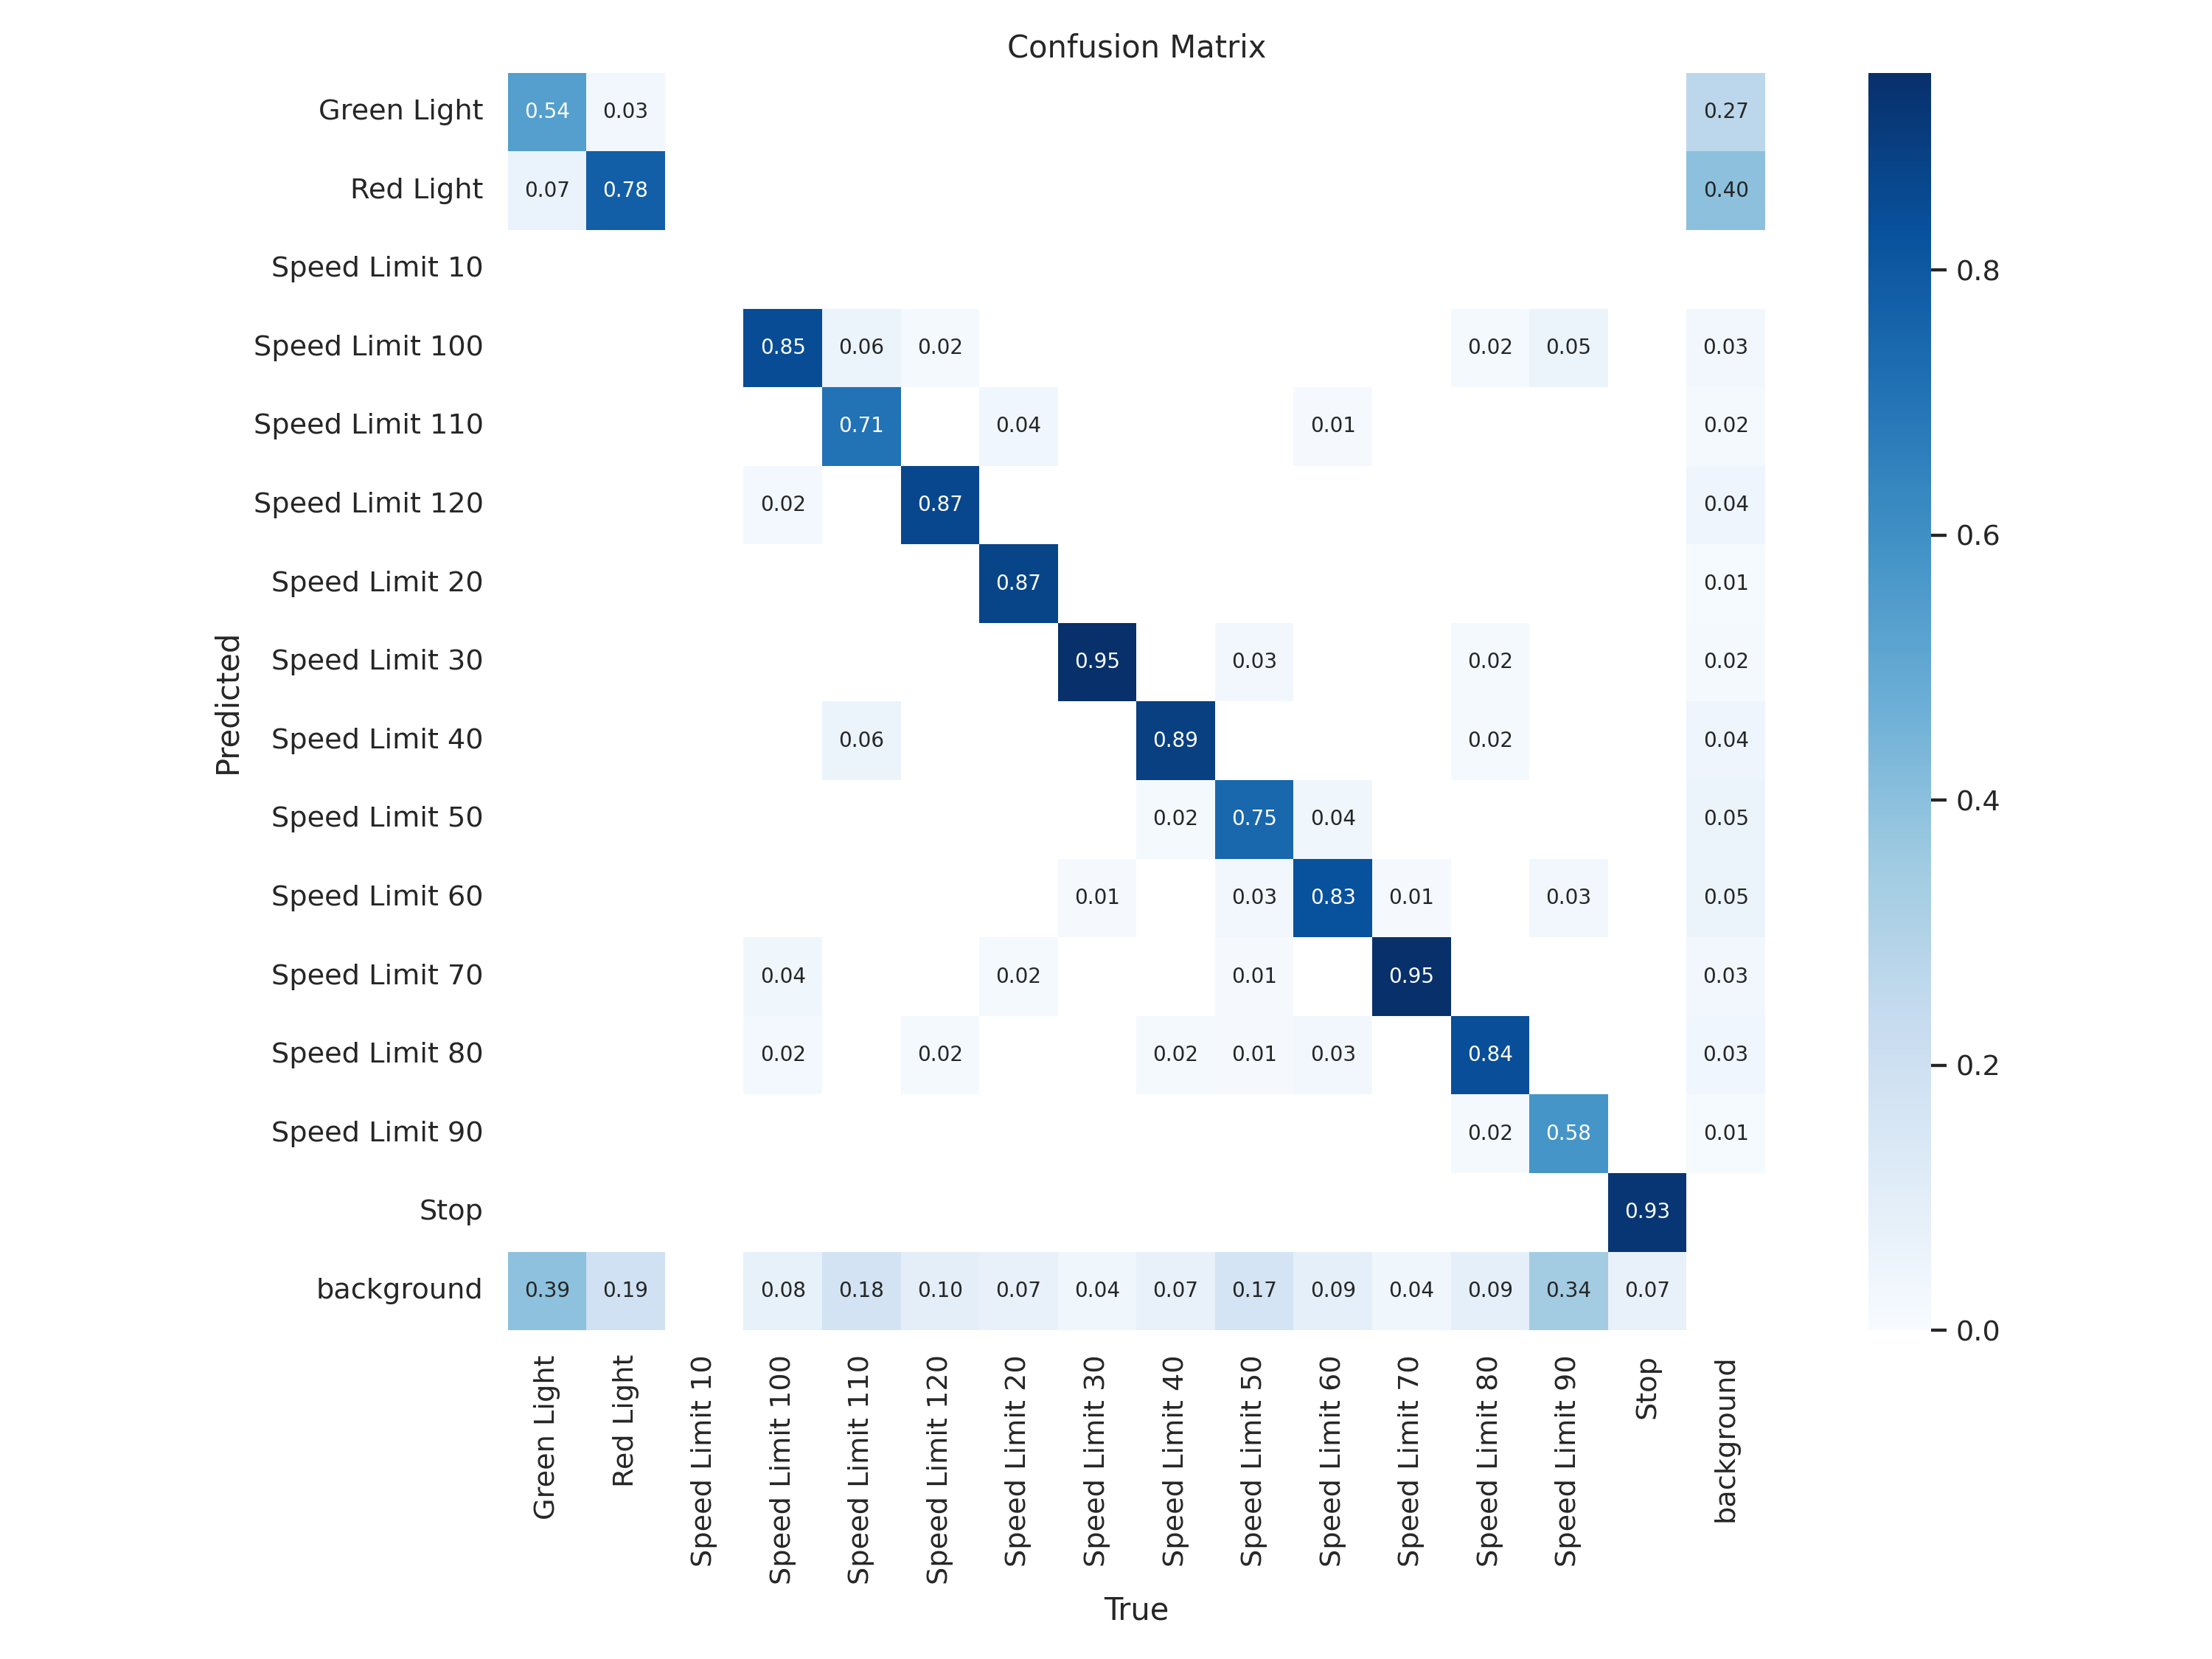

In [19]:
resultData="/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/"

from IPython.display import Image, display

Image(filename = f'{resultData}confusion_matrix.png')

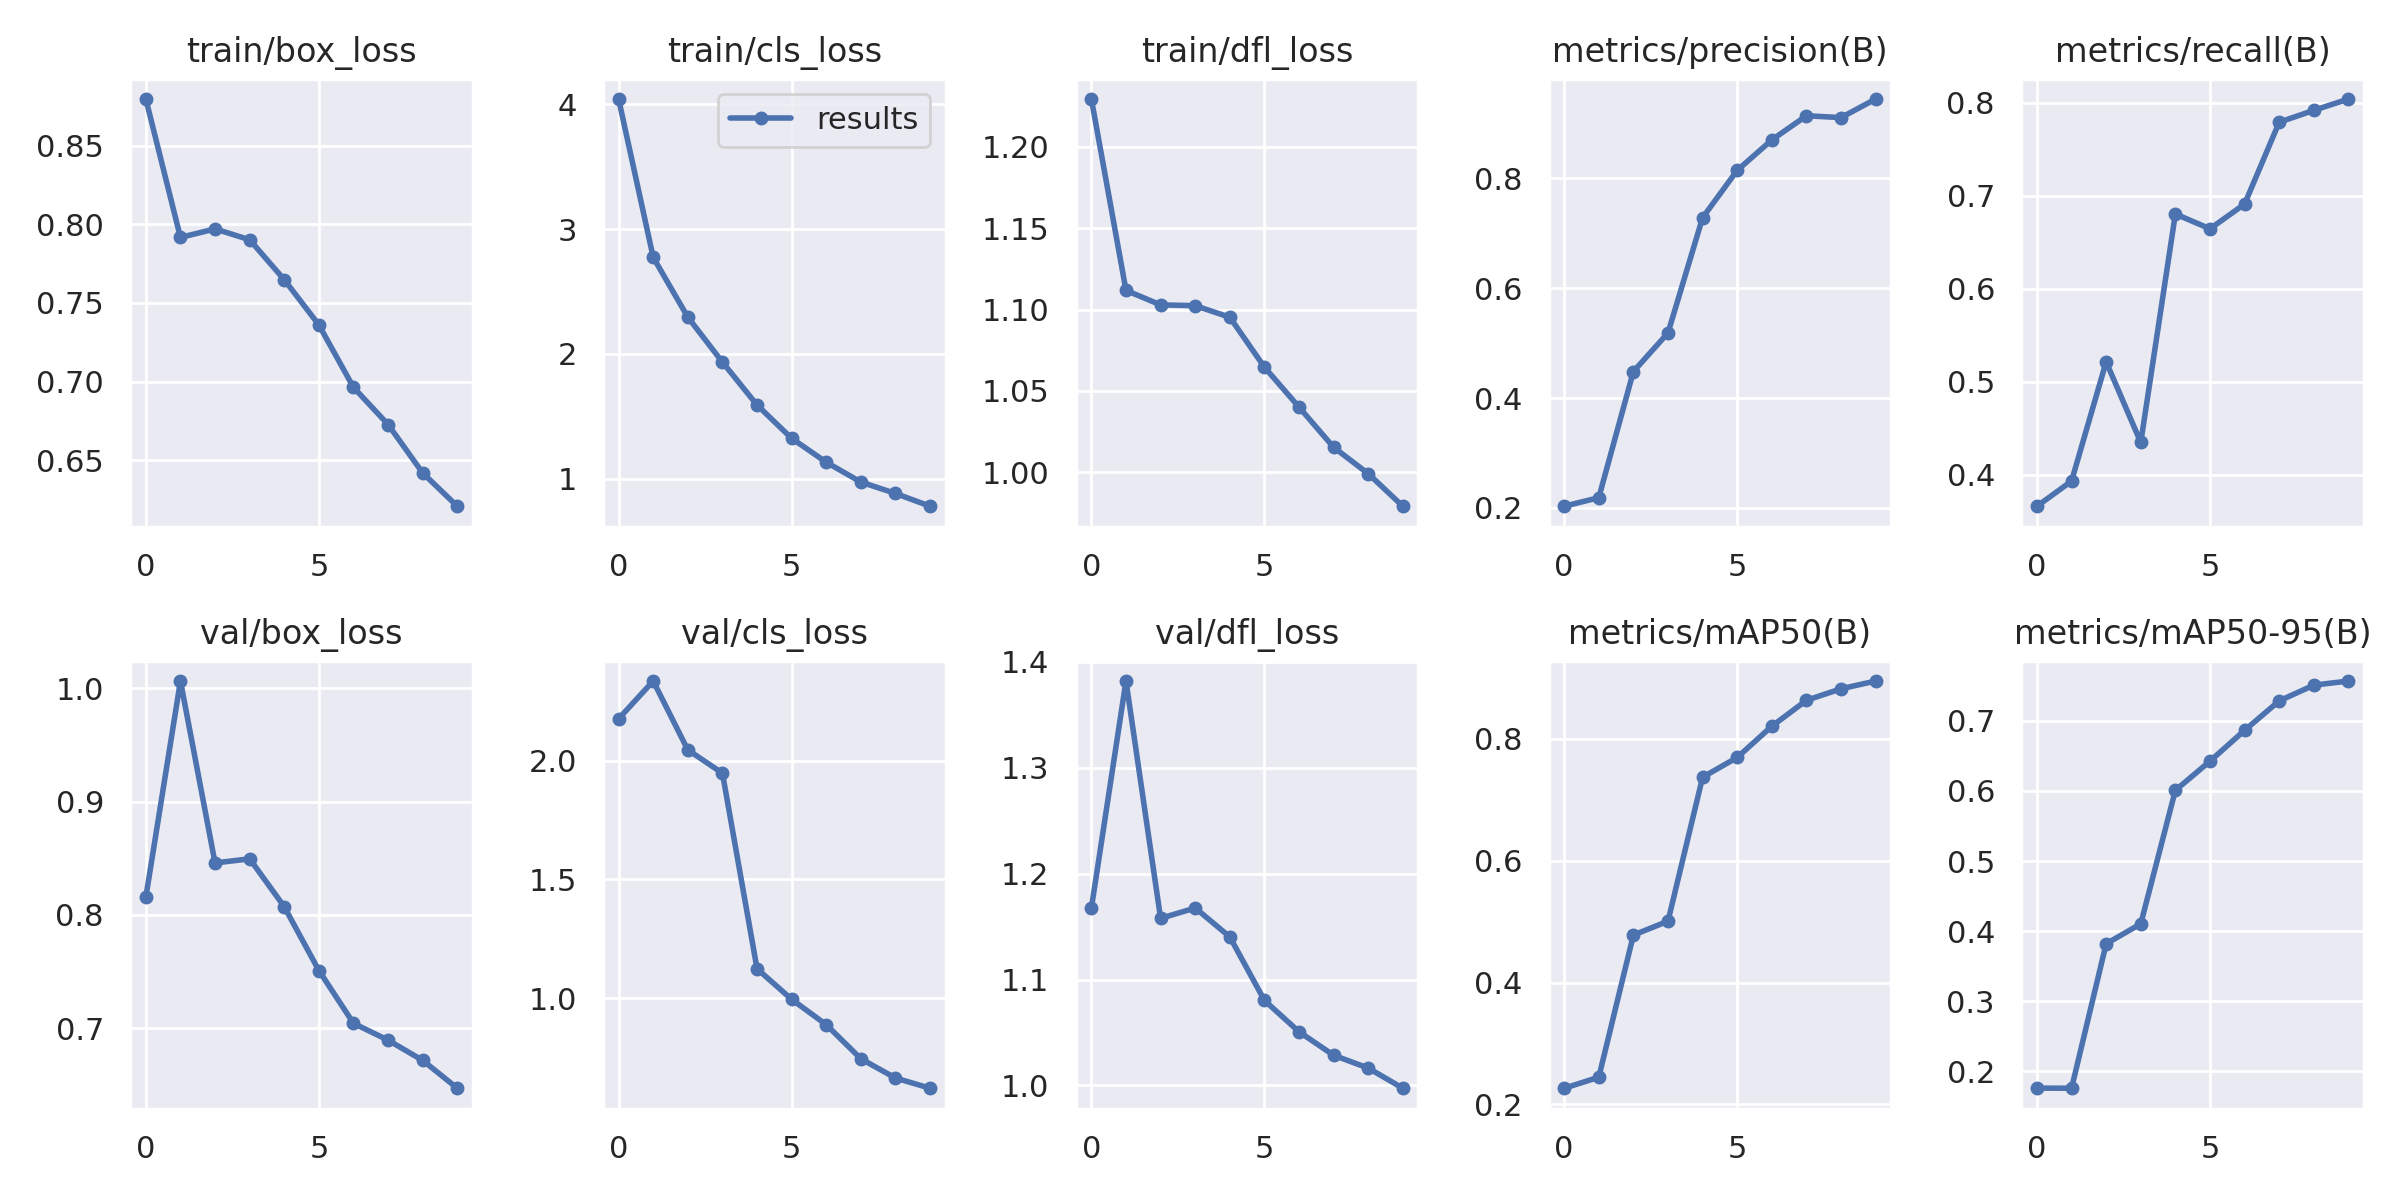

In [20]:
Image(filename = f'{resultData}results.png')

In [21]:
import pandas as pd

df=pd.read_csv(f'{resultData}results.csv')

print(df.head(3))

                  epoch        train/box_loss        train/cls_loss  \
0                     0               0.87981                4.0422   
1                     1               0.79171                2.7734   
2                     2               0.79713                2.2945   

         train/dfl_loss  metrics/precision(B)  ...          val/cls_loss  \
0                1.2295               0.20315  ...                2.1764   
1                1.1118               0.21876  ...                2.3356   
2                1.1029               0.44809  ...                2.0454   

           val/dfl_loss                lr/pg0                lr/pg1  \
0                1.1674              0.070136              0.003318   
1                1.3819              0.039477              0.005993   
2                1.1578              0.008159              0.008008   

                 lr/pg2  
0              0.003318  
1              0.005993  
2              0.008008  

[3 rows x 14 columns

In [22]:
import pandas as pd

df=pd.read_csv(f'{resultData}results.csv')

print(df.tail(1))

                  epoch        train/box_loss        train/cls_loss  \
9                     9               0.62059               0.77953   

         train/dfl_loss  metrics/precision(B)  ...          val/cls_loss  \
9               0.97906               0.94374  ...               0.61998   

           val/dfl_loss                lr/pg0                lr/pg1  \
9               0.99737               0.00208               0.00208   

                 lr/pg2  
9               0.00208  

[1 rows x 14 columns]


**Test your model on any arbitary video containing road signs**

In [23]:
%pwd

'/content/RoadSignDetection/Self-Driving-Cars-6'

In [24]:
os.chdir("/content")

In [25]:
%pwd

'/content'

In [26]:
!mkdir ManualTestingData

In [27]:
os.chdir("/content/ManualTestingData")

In [28]:
%pwd

'/content/ManualTestingData'

In [34]:
weightsPath="/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/weights"

!yolo task=detect mode=predict model={weightsPath}/best.pt conf=.25 source='/content/ManualTestingData/InputVideo.mp4' save=True

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2025-0

**Downalod The Predicted Output**

In [35]:
from google.colab import files

files.download('/content/ManualTestingData/runs/detect/predict/InputVideo.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>